In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import gradio as gr


In [2]:
# Load dataset and preprocess as before
ds = pd.read_csvds = pd.read_csv("fall.csv")
ds = ds.drop(['month', 'day'], axis=1)


In [3]:
# Separate features (x) and target variable (y)
x = ds.iloc[:, :7].values
y = ds.iloc[:, 7].values


In [4]:
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)


In [5]:
# Initialize Random Forest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

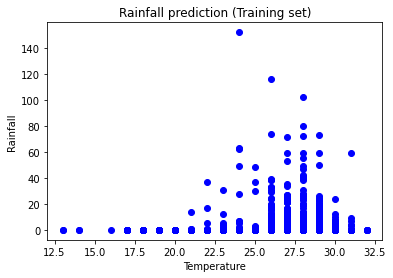

In [6]:
# Function to predict using the trained model
def predict_fall_probability(year, avgtemp, avgdp, avghumidity, avgslp, avgvisibility, avgwind):
    features = np.array([[year, avgtemp, avgdp, avghumidity, avgslp, avgvisibility, avgwind]])
    prediction = regressor.predict(features)[0]
    return prediction
plt.scatter(x_train[:,1],y_train,color='blue')      #Displaying relation b/w temp and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('Temperature')
plt.ylabel('Rainfall')
plt.show()



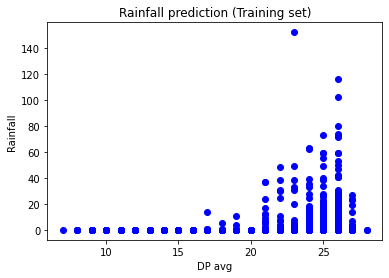

In [7]:
plt.scatter(x_train[:,2],y_train,color='blue')      #Displaying relation b/w dp avg and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('DP avg')
plt.ylabel('Rainfall')
plt.show()



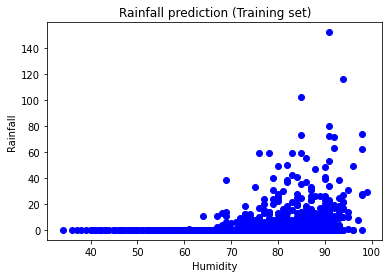

In [8]:
plt.scatter(x_train[:,3],y_train,color='blue')      #Displaying relation b/w humidity and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('Humidity')
plt.ylabel('Rainfall')
plt.show()



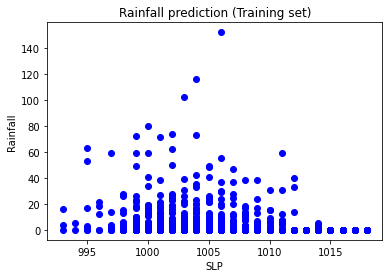

In [9]:
plt.scatter(x_train[:,4],y_train,color='blue')      #Displaying relation SLP and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('SLP')
plt.ylabel('Rainfall')
plt.show()



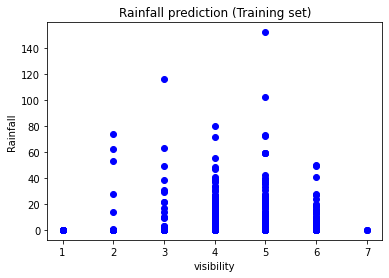

In [10]:
plt.scatter(x_train[:,5],y_train,color='blue')      #Displaying relation b/w visibility and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('visibility')
plt.ylabel('Rainfall')
plt.show()


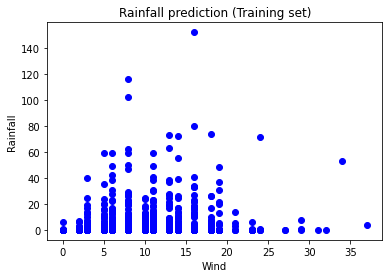

In [11]:
plt.scatter(x_train[:,6],y_train,color='blue')     #Displaying relation b/w Wind and rainfall
plt.title('Rainfall prediction (Training set)')
plt.xlabel('Wind')
plt.ylabel('Rainfall')
plt.show()


In [12]:
# Define Gradio interface
iface = gr.Interface(
    fn=predict_fall_probability,
    inputs=["text", "text", "text", "text", "text", "text", "text"],
    outputs="text",
    title="Fall Probability Prediction",
    description="Predicts the probability of fall based on input features.",
    examples=[
        [2035, 20, 22, 90, 1005, 4, 19]
    ]
)

# Launch Gradio interface
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861


C:\Users\dell\anaconda3\lib\site-packages\gradio\analytics.py:106: UserWarning: IMPORTANT: You are using gradio version 4.38.1, however version 4.44.1 is available, please upgrade. 
--------
  warnings.warn(



Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
